In [10]:
import pandas as pd
import math
# Исходные данные CSV
data = pd.read_csv("../large_prime_numbers/test_results/Miller-Rabin_21-04-2025 18-01-19.csv")

# Группировка по 'number' и вычисление статистик:
stats = data.groupby('number')['duration'].agg(
    mean_duration='mean',           # среднее время
    median_duration='median',       # медианное время
).reset_index()

stats['number'] = stats['number'].astype(float)

stats['digits'] = stats['number'].apply(lambda x: len(str(int(x))))
stats['number_log10'] = stats['number'].apply(lambda x: math.log10(x))

print(stats)


           number  mean_duration  median_duration  digits  number_log10
0    1.000000e+11       0.000003     5.000000e-07      12     11.000000
1    1.001235e+11       0.000265     2.597000e-04      12     11.000536
2    1.005298e+11       0.000258     2.556500e-04      12     11.002295
3    1.011032e+11       0.000198     1.799500e-04      12     11.004765
4    1.011072e+11       0.000181     1.728500e-04      12     11.004782
..            ...            ...              ...     ...           ...
608  5.555544e+14       0.000194     1.918000e-04      15     14.744727
609  5.784157e+14       0.000208     2.026500e-04      15     14.762240
610  5.976555e+14       0.000199     1.959500e-04      15     14.776451
611  6.101819e+14       0.000193     1.913500e-04      15     14.785459
612  6.666667e+14       0.000208     2.007000e-04      15     14.823909

[613 rows x 5 columns]


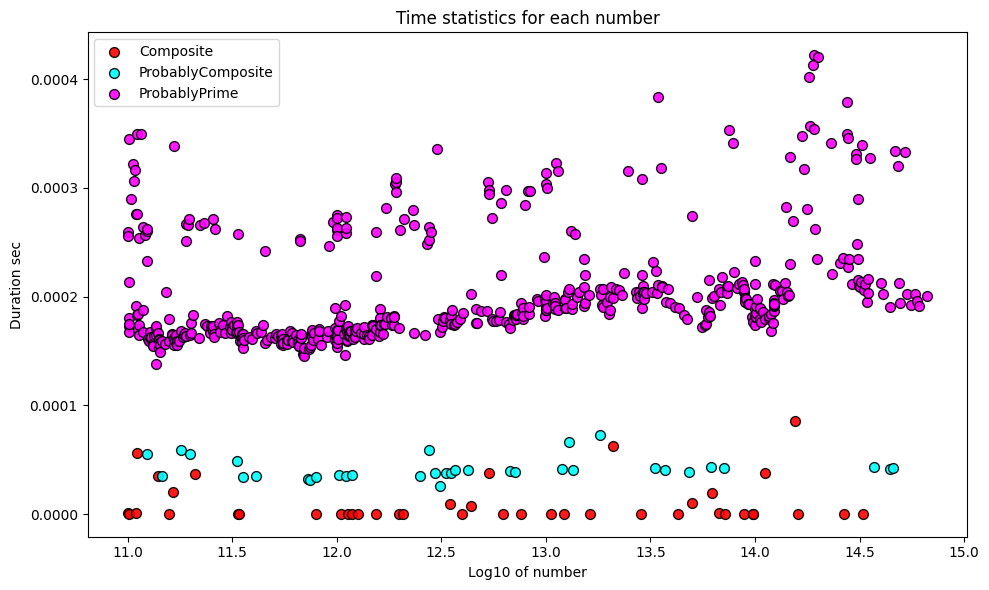

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Сбрасываем все пользовательские стили к дефолтным
mpl.rcParams.update(mpl.rcParamsDefault)

# Гарантируем белый фон для всех фигур и осей
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor']   = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'
# Настроим позиции по оси X для каждого уникального числа
x_pos = range(len(stats))

# Группируем по number, считаем mean/median и берём статус первой попытки
stats = data.groupby('number').agg(
    mean_duration   = ('duration', 'mean'),
    median_duration = ('duration', 'median'),
    status          = ('status', 'first')
).reset_index()

# Приводим number к числу, чтобы получить логарифм и длину
stats['number']       = stats['number'].astype(float)
stats['digits']       = stats['number'].apply(lambda x: len(str(int(x))))
stats['number_log10'] = stats['number'].apply(lambda x: math.log10(x))
# Задаём цвета для каждого статуса
color_map = {
    'Composite':        'red',
    'Prime':            'lime',
    'ProbablyComposite':'cyan',
    'ProbablyPrime':    'magenta',
    'NoFactorFound':    'gold'
}

# Создадим фигуру с белым фоном
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.set_facecolor('white')

# Рисуем медианные точки, раскрашенные по статусам
for st, group in stats.groupby('status'):
    ax.scatter(
        group['number_log10'],
        group['median_duration'],
        label=st,
        color=color_map.get(st, 'black'),
        alpha=0.9,
        edgecolor='k',
        s=50
    )

# Оформление оси X
#ax.set_xticks(x_pos)
#ax.set_xticklabels(stats['number'], rotation=45, ha='right')
ax.set_xlabel('Log10 of number')
ax.set_ylabel('Duration sec')
ax.set_title('Time statistics for each number')
ax.legend()
plt.tight_layout()

plt.show()

In [25]:
import pandas as pd
import math
# Исходные данные CSV
data = pd.read_csv("../large_prime_numbers/test_results/Miller-Rabin_all.csv")

# Группировка по 'number' и вычисление статистик:
stats = data.groupby('number')['duration'].agg(
    mean_duration='mean',           # среднее время
    median_duration='median',       # медианное время
).reset_index()

stats['number'] = stats['number'].astype(float)

stats['digits'] = stats['number'].apply(lambda x: len(str(int(x))))
stats['number_log10'] = stats['number'].apply(lambda x: math.log10(x))

print(stats)


            number  mean_duration  median_duration  digits  number_log10
0     1.000000e+11       0.000003         0.000002      12          11.0
1    1.000000e+100       0.104722         0.101775     101         100.0
2     1.000000e+18       0.001696         0.001675      19          18.0
3     1.000000e+18       0.001713         0.001700      19          18.0
4     1.000000e+13       0.001189         0.001182      14          13.0
..             ...            ...              ...     ...           ...
963   1.000000e+19       0.001771         0.001723      19          19.0
964   1.000000e+13       0.001183         0.001164      13          13.0
965   1.000000e+17       0.001904         0.001808      17          17.0
966   1.000000e+17       0.002613         0.002766      18          17.0
967  1.000000e+100       0.115599         0.113550     101         100.0

[968 rows x 5 columns]


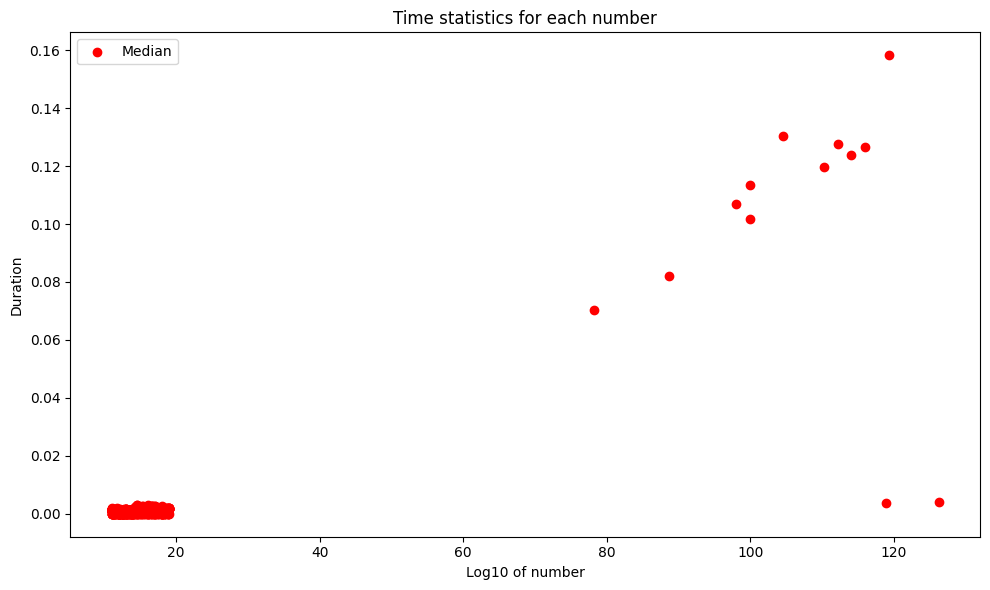

In [26]:
import matplotlib.pyplot as plt
# Настроим позиции по оси X для каждого уникального числа
x_pos = range(len(stats))

# Создадим фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Рассчитаем асимметричные "ошибки" для средних значений:
# Н

# Построим график средних значений с "errorbar" для перцентилей
#ax.errorbar(x_pos, stats['mean_duration'], fmt='o', capsize=5, label='Среднее (с 25% и 75% квантилями)')

# Отобразим медианные значения отдельными точками
ax.scatter(stats['number_log10'], stats['median_duration'], color='red', zorder=5, label='Median')

# Оформление оси X
#ax.set_xticks(x_pos)
#ax.set_xticklabels(stats['number'], rotation=45, ha='right')
ax.set_xlabel('Log10 of number')
ax.set_ylabel('Duration')
ax.set_title('Time statistics for each number')
ax.legend()
plt.tight_layout()

plt.show()